In [27]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

In [28]:
circ = QuantumCircuit(3)

In [29]:
circ.h(0)
circ.cx(0,1)
circ.cx(0,2)

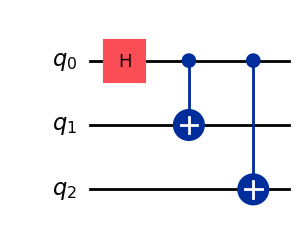

In [42]:
circ.draw('mpl')

In [44]:
#Simulate qubits
from qiskit_aer import AerSimulator
from qiskit import transpile

backend = AerSimulator(method='statevector')
# sim = AerSimulator()
# tcirc = transpile(circ, sim)
job = backend.run(circ)
result = job.result()
print(result.get_counts(circ))

# Two useful methods here: job.status() and job.result()

# #Return the state vector
# outputstate = result.get_statevector(circ, decimals=3)


QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f81cc2eb0b0>"'

In [47]:
#Trying once more with better variable names
backend = AerSimulator()
qc_compiled = transpile(circ, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts(qc_compiled)

QiskitError: 'No counts for experiment "<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f81ac674710>"'

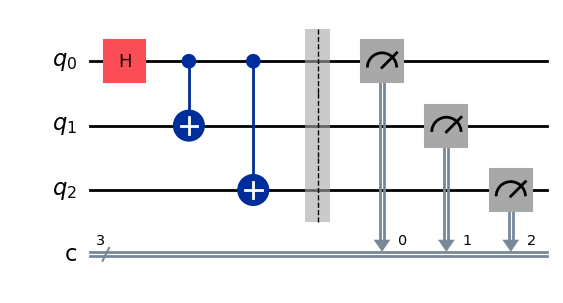

In [34]:
#Implementing measurement
meas = QuantumCircuit(3,3)
meas.barrier(range(3))
meas.measure(range(3), range(3))

qc = meas.compose(circ, range(3), front=True)
qc.draw("mpl")

In [39]:
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()

qc_compiled = transpile(qc, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

# Get results
counts = result_sim.get_counts(qc_compiled)
outputstate = result.get_statevector(qc_compiled)
print(f"Count: {counts}")

QiskitError: 'Data for experiment "circuit-173" could not be found.'